# Analysis Package Example Usage

This notebook demonstrates how to use the `analysis_package` for data wrangling, combining, visualization, and modeling.

# Download Module Example Usage

This notebook demonstrates how to use the `download` module in the `analysis_package`.

## Features
1. **Download a File**: Save a file from a URL to a specified local path.
2. **Download a CSV File**: Load a CSV file directly into a Pandas DataFrame.

## Prerequisites
Make sure the `analysis_package` is installed in your environment before proceeding.

## Features
1. Combine Module:
   - `merge_datasets`: Merge two datasets on a specified column.
   - `concat_datasets`: Concatenate multiple datasets along rows or columns.
2. Wrangle Module:
   - `clean_data`: Clean dataset by dropping NaN values.
   - `filter_data`: Filter rows based on a condition.
   - `rename_columns`: Rename columns in the dataset.

3. Visualize Module:
   - `plot_histogram`: Plot a histogram of a column.
   - `plot_scatter`: Create a scatter plot of two columns.
   - `plot_correlation_matrix`: Plot a heatmap of correlations.

Checking the version of package

In [1]:
# this should work!
import analysis_package
print(analysis_package.__version__)
print(analysis_package.__name__)
print(analysis_package.__author__)

0.1.0
analysis_package
Guled Abdullahi


Download Module

In [2]:
# Import the download functions
from analysis_package.download import download_file, download_csv
import os

# Example 1: Download a file and save it locally
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv"
save_path = "data/airtravel.csv"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Download the file
download_file(url, save_path)

# Verify the file is saved
if os.path.exists(save_path):
    print(f"File downloaded successfully and saved to: {save_path}")
else:
    print("Failed to download the file.")

# Example 2: Download a CSV file and load into Pandas DataFrame
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv"
df = download_csv(url)

# Display the first few rows of the DataFrame
print("Downloaded CSV Data:")
print(df.head())


File downloaded successfully: data/airtravel.csv
File downloaded successfully and saved to: data/airtravel.csv
CSV downloaded and loaded into a DataFrame successfully.
Downloaded CSV Data:
  Month   "1958"   "1959"   "1960"
0   JAN      340      360      417
1   FEB      318      342      391
2   MAR      362      406      419
3   APR      348      396      461
4   MAY      363      420      472


Download Module usage

Combine Module

In [3]:
# Import combine module functions
from analysis_package.combine import merge_datasets, concat_datasets
import pandas as pd

# Example 1: Merge Datasets
data1 = pd.DataFrame({"id": [1, 2, 3], "value1": [10, 20, 30]})
data2 = pd.DataFrame({"id": [2, 3, 4], "value2": [40, 50, 60]})

merged_data = merge_datasets(data1, data2, on="id", how="inner")
print("Merged Data:")
print(merged_data)

# Example 2: Concatenate Datasets
data3 = pd.DataFrame({"A": [1, 2]})
data4 = pd.DataFrame({"B": [3, 4]})

concatenated_data = concat_datasets([data3, data4], axis=1)
print("Concatenated Data:")
print(concatenated_data)

Datasets merged successfully using inner join.
Merged Data:
   id  value1  value2
0   2      20      40
1   3      30      50
Datasets concatenated successfully along axis 1.
Concatenated Data:
   A  B
0  1  3
1  2  4


Wrangle Module

In [4]:
# Import wrangle module functions
from analysis_package.wrangle import clean_data, filter_data, rename_columns

# Example 1: Clean Data
data = pd.DataFrame({"A": [1, None, 3], "B": [4, 5, None]})
cleaned_data = clean_data(data)
print("Cleaned Data:")
print(cleaned_data)

# Example 2: Filter Data
filtered_data = filter_data(data, "A > 1")
print("Filtered Data:")
print(filtered_data)

# Example 3: Rename Columns
renamed_data = rename_columns(data, {"A": "ColumnA", "B": "ColumnB"})
print("Renamed Data:")
print(renamed_data)

Data cleaned successfully.
Cleaned Data:
     A    B
0  1.0  4.0
Data filtered successfully.
Filtered Data:
     A   B
2  3.0 NaN
Columns renamed successfully.
Renamed Data:
   ColumnA  ColumnB
0      1.0      4.0
1      NaN      5.0
2      3.0      NaN


Visualize Module

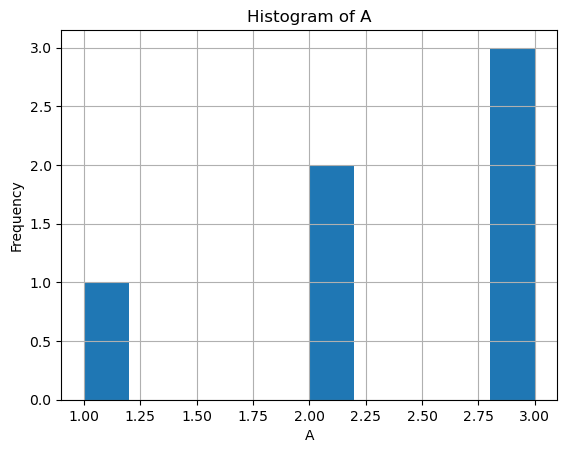

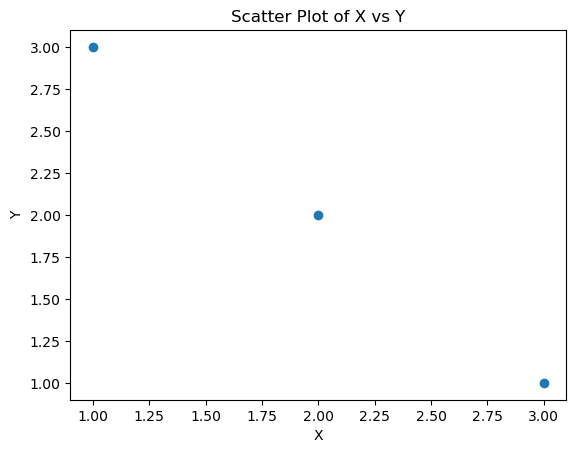

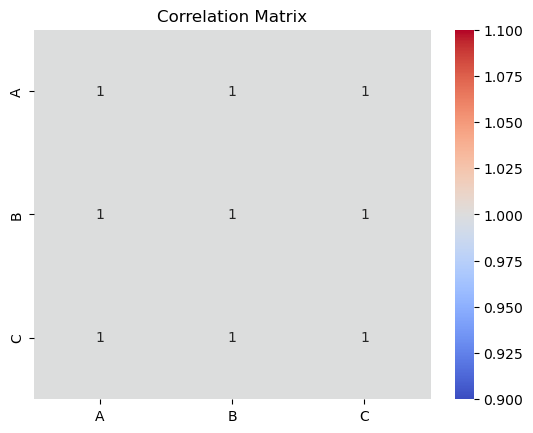

In [4]:
# Import visualize module functions
from analysis_package.visualize import plot_histogram, plot_scatter, plot_correlation_matrix

# Example 1: Plot Histogram
data = pd.DataFrame({"A": [1, 2, 2, 3, 3, 3]})
plot_histogram(data, "A")

# Example 2: Plot Scatter
scatter_data = pd.DataFrame({"X": [1, 2, 3], "Y": [3, 2, 1]})
plot_scatter(scatter_data, "X", "Y")

# Example 3: Plot Correlation Matrix
correlation_data = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6], "C": [7, 8, 9]})
plot_correlation_matrix(correlation_data)